In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#open train data
df_train = pd.read_csv('train_data.csv')
X_train, y_train = df_train.iloc[:,:-1], df_train.iloc[:,-1]

#open test data
df_test = pd.read_csv('test_data.csv')
X_test, y_test = df_test.iloc[:,:-1], df_test.iloc[:,-1]

We are going to tune two basic linear regression algorithms: Lasso and Ridge. Both have a hyperparameter called alpha which needs to be tuned in order to achieve best performance. Read: https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c

# Manual tuning of hyperparameter

For RIDGE regression

In [3]:
#create pipeline for standardization and training to avoild data leakage
model_rdg = Ridge()
pipeline = Pipeline([('sc', StandardScaler()),
                     ('rr', model_rdg)])

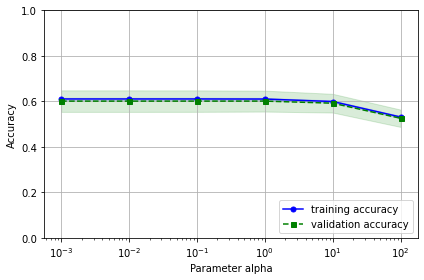

In [4]:
param_range_list = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0] #list of all possible values of the hyperparameter
train_scores, test_scores = validation_curve(
                estimator = pipeline, 
                X = X_train, 
                y = y_train, 
                param_name = 'rr__alpha', # rr is the variable name given to Ridge regression algorithm in the pipline
                                          # alpha is Ridge regression's hyperparamater
                param_range = param_range_list,
                cv = 10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range_list, train_mean, 
         color = 'blue', marker = 'o', 
         markersize = 5, label = 'training accuracy')

plt.fill_between(param_range_list, train_mean + train_std,
                 train_mean - train_std, alpha = 0.15,
                 color = 'blue')

plt.plot(param_range_list, test_mean, 
         color = 'green', linestyle ='--', 
         marker = 's', markersize = 5, 
         label = 'validation accuracy')

plt.fill_between(param_range_list, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha = 0.15, color = 'green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter alpha')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.tight_layout()
# plt.savefig('./figures/validation_curve.png', dpi=300)
plt.show()

For LASSO Regression

In [5]:
#create pipeline for standardization and training to avoild data leakage
model_lss = Lasso()
pipeline = Pipeline([('sc', StandardScaler()),
                     ('lssr', model_lss)])

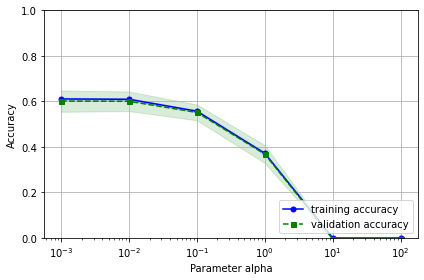

In [6]:
param_range_list = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0] #list of all possible values of the hyperparameter
train_scores, test_scores = validation_curve(
                estimator = pipeline, 
                X = X_train, 
                y = y_train, 
                param_name = 'lssr__alpha', # rr is the variable name given to Ridge regression algorithm in the pipline
                                          # alpha is Ridge regression's hyperparamater
                param_range = param_range_list,
                cv = 10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range_list, train_mean, 
         color = 'blue', marker = 'o', 
         markersize = 5, label = 'training accuracy')

plt.fill_between(param_range_list, train_mean + train_std,
                 train_mean - train_std, alpha = 0.15,
                 color = 'blue')

plt.plot(param_range_list, test_mean, 
         color = 'green', linestyle ='--', 
         marker = 's', markersize = 5, 
         label = 'validation accuracy')

plt.fill_between(param_range_list, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha = 0.15, color = 'green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter alpha')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.tight_layout()
# plt.savefig('./figures/validation_curve.png', dpi=300)
plt.show()

# Automatic hyperparameter search

Grid Search is an effective method for adjusting the parameters in supervised learning and improve the generalization performance of a model. With Grid Search, we try all possible combinations of the parameters of interest and find the best ones.

In [7]:
from sklearn.model_selection import GridSearchCV

#create pipeline for standardization and training to avoild data leakage
model_lss = Lasso()
pipeline = Pipeline([('sc', StandardScaler()),
                     ('lssr', model_lss)])

param_range_list = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid_dct = [{'lssr__alpha': param_range_list}] # we put the hyperparameter to 
                                                # to tune in a dictionary

gs = GridSearchCV(estimator = pipeline, 
                  param_grid = param_grid_dct, 
                  scoring = 'r2', 
                  cv = 10, #cross validation
                  n_jobs = -1 # set number of cores to process to all
                 )
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)
print(gs.best_estimator_)

0.601437765327147
{'lssr__alpha': 0.001}
Pipeline(steps=[('sc', StandardScaler()), ('lssr', Lasso(alpha=0.001))])


# Tuning 2 or more hyperparameters

In [8]:
from sklearn.linear_model import ElasticNet

In [9]:
from sklearn.model_selection import GridSearchCV

#create pipeline for standardization and training to avoild data leakage0
model_enet = ElasticNet()
pipeline = Pipeline([('sc', StandardScaler()),
                     ('enet', model_enet)])

from sklearn.svm import SVC

# for elastic net, we will tune the values of alpha
# and influence of l1 and l2 penalty in the model
alpha_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
l_range = np.arange(0,1.01,0.01)

param_grid_dct = [{'enet__alpha': param_range_list, # we put the hyperparameter to 
                   'enet__l1_ratio': l_range}] # to tune in a dictionary

gs = GridSearchCV(estimator = pipeline, 
                  param_grid = param_grid_dct, 
                  scoring = 'r2', 
                  cv = 10,
                  n_jobs = -1)

gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)
print(gs.best_estimator_)

0.6015300586075791
{'enet__alpha': 0.001, 'enet__l1_ratio': 0.64}
Pipeline(steps=[('sc', StandardScaler()),
                ('enet', ElasticNet(alpha=0.001, l1_ratio=0.64))])


In [10]:
best_enet = gs.best_estimator_
test_predictions = best_enet.predict(X_test)

In [11]:
from sklearn.metrics import r2_score
print(r2_score(y_test, test_predictions))

0.6097939577669464


# Faster way of finding hyperparameters

Randomized grid search is a technique where random combinations of the hyperparameters are used to find the best solution for the built model.

In [12]:
from sklearn.model_selection import RandomizedSearchCV
#create pipeline for standardization and training to avoild data leakage0
model_enet = ElasticNet()
pipeline = Pipeline([('sc', StandardScaler()),
                     ('enet', model_enet)])

# for elastic net, we will tune the values of alpha
# and influence of l1 and l2 penalty in the model
alpha_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
l_range = np.arange(0,1.01,0.01)

param_grid_dct = [{'enet__alpha': param_range_list, # we put the hyperparameter to 
                   'enet__l1_ratio': l_range}] # to tune in a dictionary

gs = RandomizedSearchCV(estimator = pipeline,
                      param_distributions = param_grid_dct,
                      scoring = 'r2', 
                      n_jobs = -1, 
                      cv = 10,
                      verbose = True)

gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)
print(gs.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.6015171143454742
{'enet__l1_ratio': 0.49, 'enet__alpha': 0.001}
Pipeline(steps=[('sc', StandardScaler()),
                ('enet', ElasticNet(alpha=0.001, l1_ratio=0.49))])


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished


# Gradient boosting

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

In [14]:
max_features = int(np.sqrt(len(X_train.columns)))
model_gb = GradientBoostingRegressor(max_features = max_features)

pipeline = Pipeline([('sc', StandardScaler()),
                     ('gb', model_gb)])

loss_range = ['ls', 'lad', 'huber', 'quantile']
learning_rate_range = [0.001, 0.01, 0.1]
n_estimators_range = [100, 500, 1000]
subsample_range = np.arange(0.5,2.1,0.1)
min_samples_split_range = np.arange(2,11)
min_samples_leaf_range = np.arange(1,11)
max_depth_range = np.arange(3,11)

param_grid_dct = [{
                'gb__loss': loss_range, 
                'gb__learning_rate': learning_rate_range,
                'gb__n_estimators': n_estimators_range,
                'gb__subsample': subsample_range,
                'gb__min_samples_split': min_samples_split_range,
                'gb__min_samples_leaf': min_samples_leaf_range,
                'gb__max_depth': max_depth_range
                 }]

gs = RandomizedSearchCV(estimator = pipeline,
                      param_distributions = param_grid_dct,
                      scoring = 'r2', 
                      n_jobs = -1, 
                      cv = 10,
                      verbose = True)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)
print(gs.best_estimator_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  93 out of 100 | elapsed:  2.3min remaining:   10.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.6min finished


0.7994612789732634
{'gb__subsample': 0.9999999999999999, 'gb__n_estimators': 1000, 'gb__min_samples_split': 9, 'gb__min_samples_leaf': 10, 'gb__max_depth': 8, 'gb__loss': 'huber', 'gb__learning_rate': 0.01}
Pipeline(steps=[('sc', StandardScaler()),
                ('gb',
                 GradientBoostingRegressor(learning_rate=0.01, loss='huber',
                                           max_depth=8, max_features=2,
                                           min_samples_leaf=10,
                                           min_samples_split=9,
                                           n_estimators=1000,
                                           subsample=0.9999999999999999))])


# comparing this to an untuned GB

In [15]:
model_gb_untuned = GradientBoostingRegressor()
pipeline = Pipeline([('sc', StandardScaler()),
                     ('gb', model_gb_untuned)])

scores = cross_val_score(pipeline, 
                         X_train, y_train, 
                         cv = 10, 
                         scoring = 'r2')
print(scores)
print(f'average: {scores.mean()}')

[0.7060609  0.7104763  0.74116175 0.68337193 0.79152324 0.73404529
 0.74380738 0.78597829 0.78994368 0.78442745]
average: 0.7470796217322867
